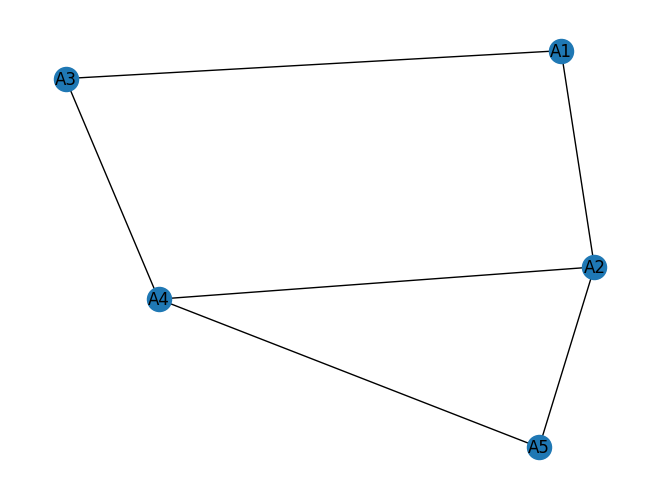

Clici: [['A1', 'A3'], ['A1', 'A2'], ['A4', 'A3'], ['A4', 'A2', 'A5']]
Z = 73352101389.00581
    A1  A2  A3  A4  A5             u             p
31   1   1   1   1   1  7.200490e+10  9.816338e-01
15  -1   1   1   1   1  1.318816e+09  1.797925e-02
23   1  -1   1   1   1  2.415495e+07  3.293014e-04
30   1   1   1   1  -1  3.269017e+06  4.456610e-05
27   1   1  -1   1   1  4.424134e+05  6.031366e-06
7   -1  -1   1   1   1  4.424134e+05  6.031366e-06
14  -1   1   1   1  -1  5.987414e+04  8.162567e-07
29   1   1   1  -1   1  8.103084e+03  1.104683e-07
11  -1   1  -1   1   1  8.103084e+03  1.104683e-07
22   1  -1   1   1  -1  1.096633e+03  1.495026e-08
MAP:
    A1  A2  A3  A4  A5             u         p
31   1   1   1   1   1  7.200490e+10  0.981634


In [26]:
# 1.a_b
# nu merge 'from pgmpy.models import MarkovNetwork'
import itertools
import math
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

edges = [
    ('A1','A2'),
    ('A1','A3'),
    ('A2','A4'),
    ('A2','A5'),
    ('A3','A4'),
    ('A4','A5')
]

G = nx.Graph()
G.add_edges_from(edges)

plt.figure()
nx.draw(G, with_labels=True)
plt.show()

cliques = list(nx.find_cliques(G))
print("Clici:", cliques)

vars = ['A1','A2','A3','A4','A5']
index = {'A1':1,'A2':2,'A3':3,'A4':4,'A5':5}

toate = list(itertools.product([-1,1], repeat=5))

l = []
for a in toate:
  asg = dict(zip(vars,a))
  p = 1
  for C in cliques:
    s = sum(index[v]*asg[v] for v in C)
    p *= math.exp(s)
  asg['u'] = p
  l.append(asg)

df = pd.DataFrame(l)
Z = df['u'].sum()
df['p'] = df['u']/Z
df = df.sort_values('p',ascending=False)

print("Z =", Z)
print(df.head(10))

m = df[df['p']==df['p'].max()]
print("MAP:")
print(m)


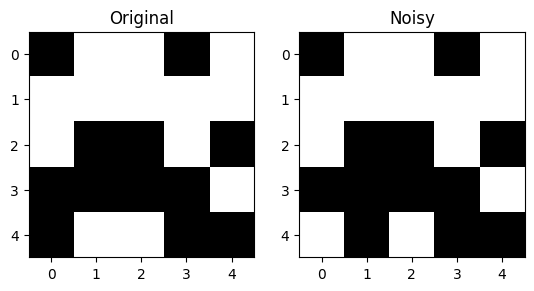

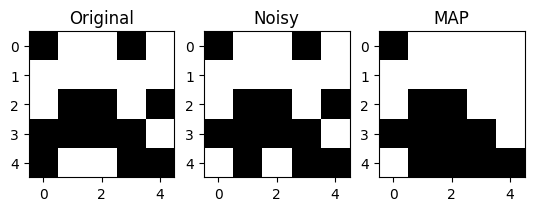

In [27]:
# 2.a_b

import numpy as np
import random
import matplotlib.pyplot as plt

# imagine originala
np.random.seed(0)
orig = np.random.randint(0,2,(5,5))

# noise
noisy = orig.copy()
nr_pix = int(0.1*25)
for _ in range(nr_pix):
  i = random.randint(0,4)
  j = random.randint(0,4)
  noisy[i,j] = 1 - noisy[i,j]

plt.subplot(1,2,1)
plt.imshow(orig,cmap='gray')
plt.title("Original")
plt.subplot(1,2,2)
plt.imshow(noisy,cmap='gray')
plt.title("Noisy")
plt.show()

lmbd = 2.0

def energy(x,y,l):
  e1 = np.sum(l*(x-y)**2)
  e2 = 0
  for i in range(5):
    for j in range(5):
      if i<4: e2 += (x[i,j]-x[i+1,j])**2
      if j<4: e2 += (x[i,j]-x[i,j+1])**2
  return e1+e2

x = noisy.copy()

for _ in range(10):
  for i in range(5):
    for j in range(5):
      old = x[i,j]
      x[i,j] = 1 - old
      e1 = energy(x,noisy,lmbd)
      x[i,j] = old
      e0 = energy(x,noisy,lmbd)
      if e1 < e0:
        x[i,j] = 1 - old

plt.subplot(1,3,1)
plt.imshow(orig,cmap='gray')
plt.title("Original")
plt.subplot(1,3,2)
plt.imshow(noisy,cmap='gray')
plt.title("Noisy")
plt.subplot(1,3,3)
plt.imshow(x,cmap='gray')
plt.title("MAP")
plt.show()
